In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [99]:
setwd('/import/DB/fel/BJTC-204')

In [100]:
library(dplyr)

In [4]:
diffgeen1 = read.csv('diffgene1.csv',row.names = 1) %>% rownames()

In [5]:
diffgeen2 = read.csv('diffgene2.csv',row.names = 1)%>% rownames()

In [6]:
head(diffgeen2,2)

[1] "NELL1" "PTPRN"

In [6]:
# over = intersect(diffgeen1,diffgeen2)

In [7]:
over = diffgeen2

In [8]:
length(over)

[1] 85

In [101]:
load('./exp4.rda')

In [10]:
colnames(exp4) = gsub('-','.',colnames(exp4))

In [102]:
over = c('SELL','RAP2B')

In [103]:
expr = exp4[,c(over)]

In [104]:
head(expr)

,SELL,RAP2B
,<dbl>,<dbl>
GSM2431721,6.273327,5.363324
GSM2431722,5.942055,5.357565
GSM2431723,6.697859,5.230327
GSM2431726,6.731599,5.304061
GSM2431727,5.919214,5.180090
GSM2431728,5.927710,5.379234


In [105]:
type = exp4$TYPE

In [106]:
type = ifelse(type == 'MDD',1,0)

In [107]:
y = type

In [108]:
colnames(expr) = gsub('-','.',colnames(expr))

In [109]:
expr <- expr[, !grepl("^\\d+", names(expr))]

In [110]:
library(dplyr)

In [111]:
x = as.matrix(expr)
y = y

In [112]:
library(randomForest)

png 
  2

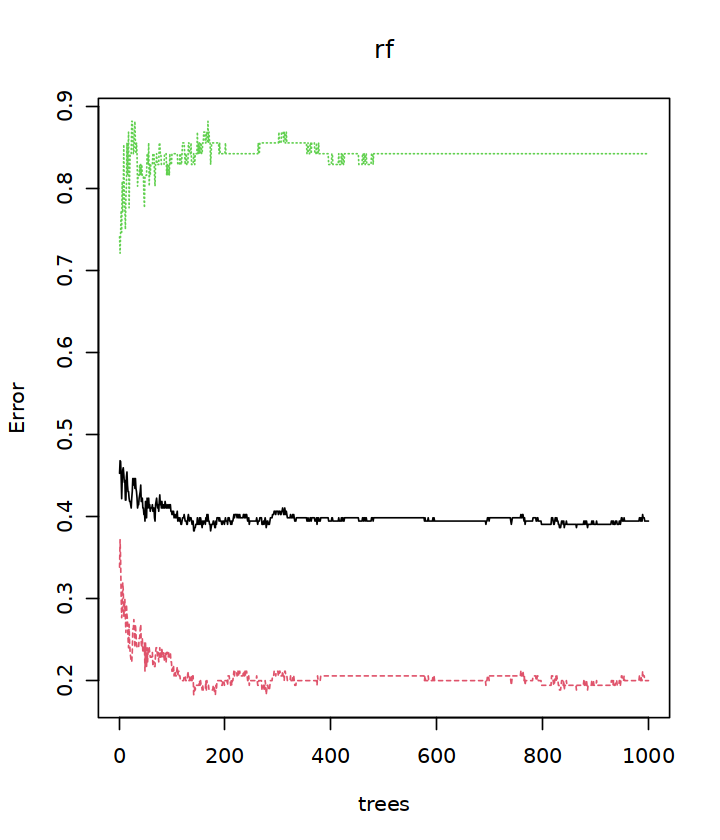

In [113]:
set.seed(111)

rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

plot(rf)

pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

SELL    RAP2B 
53.43198 50.78321

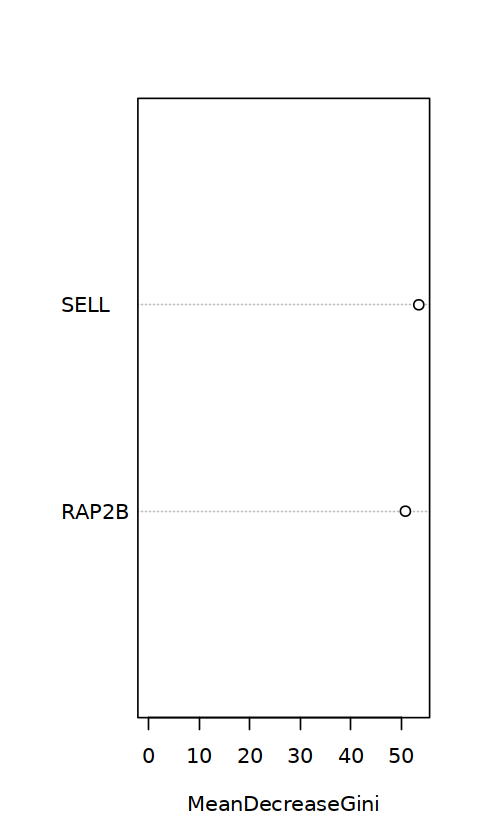

In [114]:


trees = which.min(rf$err.rate[,1])

rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

importance = importance(rf)

pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

# RPE65 + MC3R+NFIL3 + PRF1 + IL6

options(repr.plot.width = 4)

varImpPlot(rf,main = '')

rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

rfGenes

In [115]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# # expr2 = exp4

# # sigExp=expr2[rfGenes,]
# # write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# # rfGenes

### svm

In [35]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

[1] 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 [38] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
[112] 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Boruta performed 299 iterations in 18.33705 secs.
 13 attributes confirmed important: ACOT7, ARHGDIG, BEX1, DYNC1I1,
MCTS1 and 8 more;
 69 attributes confirmed unimportant: ACSBG1, AGXT2L1, ATP1A3, ATP5G3,
ATP6V0D1 and 64 more;
 3 tentative attributes left: GJA1, PIN1, TAC1;


Tentative Confirmed  Rejected 
        3        13        69 

NELL1     PTPRN     PRSS3     ACOT7       SYP      RIT2   ARHGDIG     GABRD 
Confirmed  Rejected Confirmed Confirmed  Rejected  Rejected Confirmed  Rejected 
   ATP1A3     HMP19    SYNGR3     TUSC3      PIN1   SLC17A7     NPTX1      SYN2 
 Rejected  Rejected  Rejected  Rejected Tentative Confirmed Confirmed Confirmed 
  DYNC1I1     MCTS1      RBP4   GUCY1B3      CRYM    IFITM1      PTMS     CALM3 
Confirmed Confirmed  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
   EFEMP1     TIMP1      CHGB     EIF4E     GAP43     CISD1      LY6H      SNCA 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
  ATP6V1A      BEX1     PRKCB      PGK1      GOT1     UCHL1     G3BP2      PON2 
 Rejected Confirmed  Rejected Confirmed  Rejected  Rejected  Rejected  Rejected 
    NCALD     ITFG1      NRN1     SEPP1  ATP6V1G2       CCK      NBEA    ACSBG1 
 Rejected  Rejected  Rejected Confirmed  Rejected  Rejected  Rejected  Rejected 
    COX5A      ENO2     TUBB4     STMN2    ATP5G3      SOX9     MOAP1      GLRB 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    PCSK1    SLC1A3  ATP6V0D1      SCG2  SERPINI1       SST     PCMT1    NAP1L2 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
    HPRT1    GABRG2      MAP2    KIFAP3     PVALB      SDC4    SUCLA2      GJA1 
 Rejected  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected Tentative 
     NEFL      RGS4  ATP6V1B2     DCLK1      CHL1   AGXT2L1     VSNL1    CAPZA2 
 Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
 SERPINA3      SYT1     YWHAH    S100A8      TAC1 
 Rejected  Rejected  Rejected  Rejected Tentative 
Levels: Tentative Confirmed Rejected

Boruta performed 299 iterations in 18.33705 secs.
 13 attributes confirmed important: ACOT7, ARHGDIG, BEX1, DYNC1I1,
MCTS1 and 8 more;
 69 attributes confirmed unimportant: ACSBG1, AGXT2L1, ATP1A3, ATP5G3,
ATP6V0D1 and 64 more;
 3 tentative attributes left: GJA1, PIN1, TAC1;

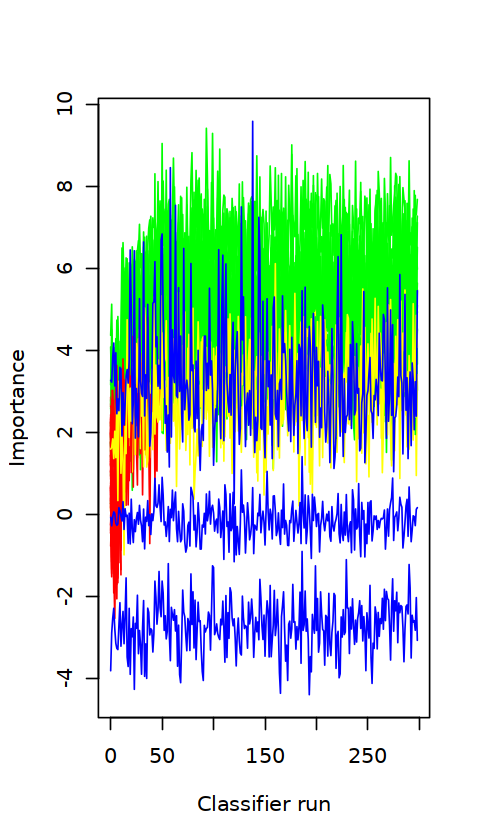

In [36]:
library(Boruta)

y

set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

boruta

table(boruta$finalDecision)

boruta$finalDecision

Boruta::plotImpHistory(boruta)

library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


boruta

# library(YSX)

# sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
#            legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
#            xtics_angle = 90)

# expr = cbind(Type,expr)

# colnames(expr)[1]  ='Group'

# expr3 = expr

# set.seed(147)  
# index <-  which( (1:nrow(expr3))%%3 == 0 )
# train <- expr3[-index,]
# test <- expr3[index,]

# table(test$Group)

# library("xgboost")
# library("Matrix")
# train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
# test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
# all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)



# train_label <- as.numeric(train$Group == 'MDD')
# test_label <-  as.numeric(test$Group == 'MDD')
# all_label <-  as.numeric(expr3$Group == 'MDD')

# all_label

# train_fin <- list(data=train_matrix,label=train_label) 
# test_fin <- list(data=test_matrix,label=test_label) 
# all_fin <- list(data=all_matrix,label=all_label) 

# dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
# dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
# dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

# xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
#   objective='binary:logistic', nround=25)

# xgb

# importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
# head(importance)
# xgb.ggplot.importance(importance)

# xgb.plot.importance(importance)

In [37]:
# lasso

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.3"
Loaded glmnet 4.1-8



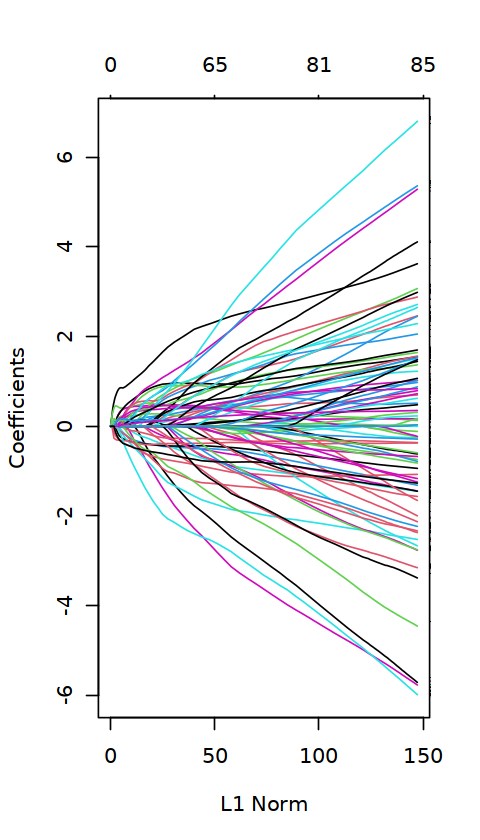

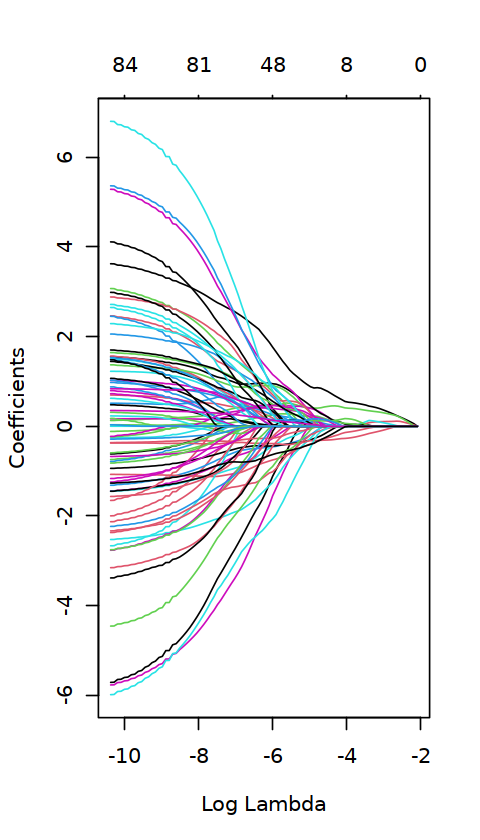

[1] 0.02299558 0.12272048

[1] "NELL1"   "PTPRN"   "PRSS3"   "ARHGDIG" "TIMP1"   "SEPP1"   "TUBB4"

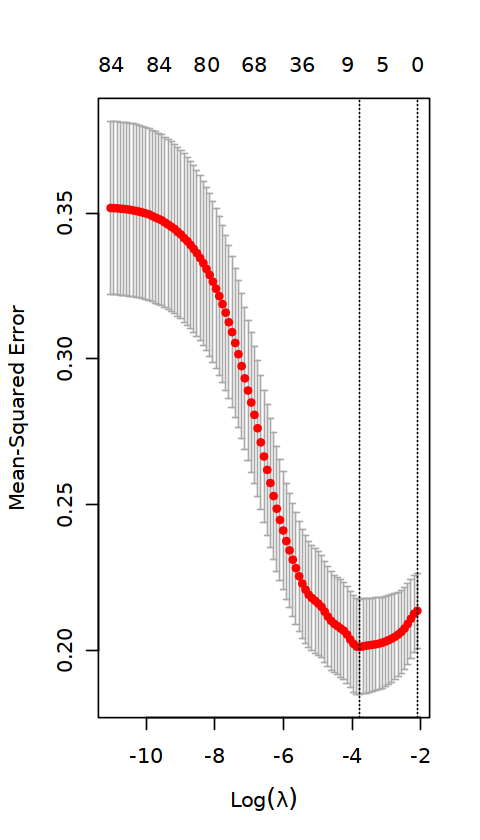

In [38]:
library(lars) 
library(glmnet) 

#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

plot(model_lasso, xvar="lambda", label=TRUE)

cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min	)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

gene_1se

# ### 韦恩图

# importance$Feature

# RF.gene = names(rfGenes)[1:10]
# #SVF.RFE.gene = featureGenes
# XGBoost.gene = importance$Feature[1:10]

# boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

# Boruta.gene = as.vector(boruta.variable.imp2$Variable)

# lasso.gene  = gene_1se

# list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

# data =  as.data.frame (do.call (cbind, list1))


# library(venn)
#         library(VennDiagram)
#         color=c( "#3C5488B2","#00A087B2", 
#              "#F39B7FB2","#91D1C2B2", 
#              "#8491B4B2", "#DC0000B2", 
#              "#7E6148B2","yellow", 
#              "darkolivegreen1", "lightskyblue", 
#              "darkgreen", "deeppink", "khaki2", 
#              "firebrick", "brown1", "darkorange1", 
#              "cyan1", "royalblue4", "darksalmon", 
#              "darkgoldenrod1", "darkseagreen", "darkorchid")

#     if (ncol(data) == 2){
#         sample_list <- list(c1 = data[,1], c2 = data[,2])
#     }else if(ncol(data) == 3){
#         sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
#     }else if(ncol(data) == 4){
#         sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
#     }else{
#         sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
#     }
    
#     q <- venn.diagram(sample_list,filename = NULL,
#              fill = color[1:(length(sample_list))],
#              alpha = 0.50, cat.col = rep('black', ncol(data)), 
#              col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
#                              )
#     pdf(paste0('./',"venn.pdf"))
#     grid.draw(q)
#     dev.off()

# grid.draw(q)

# intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

# model.gene = intersect(lasso.gene,XGBoost.gene)



# model.gene  =lasso.gene

# model.gene

In [39]:
set.seed(1234)

In [116]:
expr3 = cbind(y,x) %>%  as.data.frame()

In [117]:
colnames(expr3)[1] = 'Group'

In [118]:
expr4 = expr3 

In [119]:
dim(expr4)

[1] 251   3

In [120]:
model.gene = colnames(expr4)[2:dim(expr4)[2]]

In [121]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.6){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

### 批量单因素逻辑回归

In [122]:
a

NULL

In [47]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [51]:
Boruta.gene

[1] "ACOT7"   "ARHGDIG" "BEX1"    "DYNC1I1" "GJA1"    "MCTS1"   "NELL1"  
 [8] "NPTX1"   "PGK1"    "PIN1"    "PRSS3"   "PVALB"   "SEPP1"   "SLC17A7"
[15] "SYN2"    "TAC1"

In [70]:
gene = intersect(Boruta.gene,a)

In [49]:
gene_1se

[1] "NELL1"   "PTPRN"   "PRSS3"   "ARHGDIG" "TIMP1"   "SEPP1"   "TUBB4"

In [71]:
gene

[1] "ACOT7"   "ARHGDIG" "BEX1"    "DYNC1I1" "MCTS1"   "NELL1"   "NPTX1"  
 [8] "PGK1"    "PIN1"    "PRSS3"   "SLC17A7" "SYN2"

In [123]:
expr4 = expr3

In [96]:
gene = c('SELL')

In [97]:
expr4 = expr4[,c('Group',gene)]

ERROR: Error in `[.data.frame`(expr4, , c("Group", gene)): undefined columns selected


In [75]:
#expr4 = expr4

In [126]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

data = expr4[,c('Group',tzgene)]

Waiting for profiling to be done...

Waiting for profiling to be done...



,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SELL,-0.7300219,0.4598208,-1.5876226,0.1123717,0.4818984,0.18957874,1.159125,SELL
RAP2B,-0.4422722,0.9430537,-0.4689789,0.6390847,0.6425747,0.08866357,3.762398,RAP2B


Estimate,P,OR,CIlower,CIupper,Characteristics
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


character(0)

In [127]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)

ERROR: Error in model.frame.default(formula = Group ~ ., data = data, drop.unused.levels = TRUE): 'data' must be a data.frame, environment, or list


In [128]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)

ERROR: Error in model.frame.default(formula = Group ~ ., data = data, drop.unused.levels = TRUE): 'data' must be a data.frame, environment, or list


In [79]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=299.43
Group ~ ACOT7 + ARHGDIG + BEX1 + DYNC1I1 + MCTS1 + NELL1 + NPTX1 + 
    PGK1 + PIN1 + PRSS3 + SLC17A7 + SYN2

          Df Deviance    AIC
- DYNC1I1  1   273.43 297.43
- PGK1     1   273.43 297.43
- SYN2     1   273.43 297.43
- BEX1     1   273.44 297.44
- ACOT7    1   273.81 297.81
- SLC17A7  1   273.96 297.96
- MCTS1    1   274.38 298.38
- NPTX1    1   274.89 298.89
<none>         273.43 299.43
- PIN1     1   276.10 300.10
- ARHGDIG  1   276.25 300.25
- NELL1    1   276.90 300.90
- PRSS3    1   281.89 305.89

Step:  AIC=297.43
Group ~ ACOT7 + ARHGDIG + BEX1 + MCTS1 + NELL1 + NPTX1 + PGK1 + 
    PIN1 + PRSS3 + SLC17A7 + SYN2

          Df Deviance    AIC
- SYN2     1   273.44 295.44
- BEX1     1   273.44 295.44
- PGK1     1   273.44 295.44
- ACOT7    1   273.81 295.81
- SLC17A7  1   274.06 296.06
- MCTS1    1   274.45 296.45
- NPTX1    1   274.90 296.90
<none>         273.43 297.43
- ARHGDIG  1   276.30 298.30
- PIN1     1   276.66 298.66
+ DYNC1I1  1   273.43 299.4


Call:
glm(formula = Group ~ ARHGDIG + NELL1 + PIN1 + PRSS3, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3794  -0.8477  -0.5865   1.1168   2.5682  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.9363     2.8936  -5.162 2.45e-07 ***
ARHGDIG       0.6647     0.3731   1.782  0.07481 .  
NELL1         0.9445     0.3662   2.579  0.00992 ** 
PIN1         -0.7924     0.4312  -1.837  0.06615 .  
PRSS3         1.0015     0.3304   3.031  0.00244 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 307.83  on 250  degrees of freedom
Residual deviance: 276.52  on 246  degrees of freedom
AIC: 286.52

Number of Fisher Scoring iterations: 4


In [80]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-14.936,26.644,0(0~0),<0.001
ARHGDIG,0.665,3.174,1.944(0.945~4.14),0.075
NELL1,0.944,6.650,2.571(1.267~5.377),0.010
PIN1,-0.792,3.376,0.453(0.192~1.048),0.066
PRSS3,1.001,9.187,2.722(1.455~5.347),0.002


In [81]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Waiting for profiling to be done...



In [82]:
#save(b,file = 'b.rda')

In [83]:
data = data[,c('Group',b)]

In [84]:
library(autoReg)

In [85]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=175),1 (N=76),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ARHGDIG,Mean <U+00B1> SD,7.9 <U+00B1> 0.6,8.2 <U+00B1> 0.7,ARHGDIG,"2.32 (1.44-3.73, p<.001)","1.94 (0.94-4.04, p=.075)"
NELL1,Mean <U+00B1> SD,7.7 <U+00B1> 0.7,8.1 <U+00B1> 0.6,NELL1,"2.75 (1.68-4.48, p<.001)","2.57 (1.25-5.27, p=.010)"
PIN1,Mean <U+00B1> SD,8.1 <U+00B1> 0.7,8.4 <U+00B1> 0.7,PIN1,"2.01 (1.33-3.05, p=.001)","0.45 (0.19-1.05, p=.066)"
PRSS3,Mean <U+00B1> SD,7.7 <U+00B1> 0.5,8.0 <U+00B1> 0.6,PRSS3,"2.92 (1.70-5.03, p<.001)","2.72 (1.42-5.20, p=.002)"


In [86]:
library(caret)

In [87]:
set.seed(141)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=5)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] 0.7282312

In [88]:
auc_value

[1] 0.7213925 0.7362884 0.7319169 0.7188329 0.7307338 0.7420375 0.7039593
 [8] 0.7134161 0.7292134 0.7545213

In [89]:
num <- which.max(auc_value)
print(num)

fold_test <- data[folds[[num]],]   
fold_train <- data[-folds[[num]],]

fold_pre <- glm(Group~.,data=fold_train,family=binomial())

fold_predict <- predict(fold_pre,type='response',newdata=fold_test)

options(repr.plot.width = 6)

[1] 10


Setting levels: control = 0, case = 1

Setting direction: controls < cases



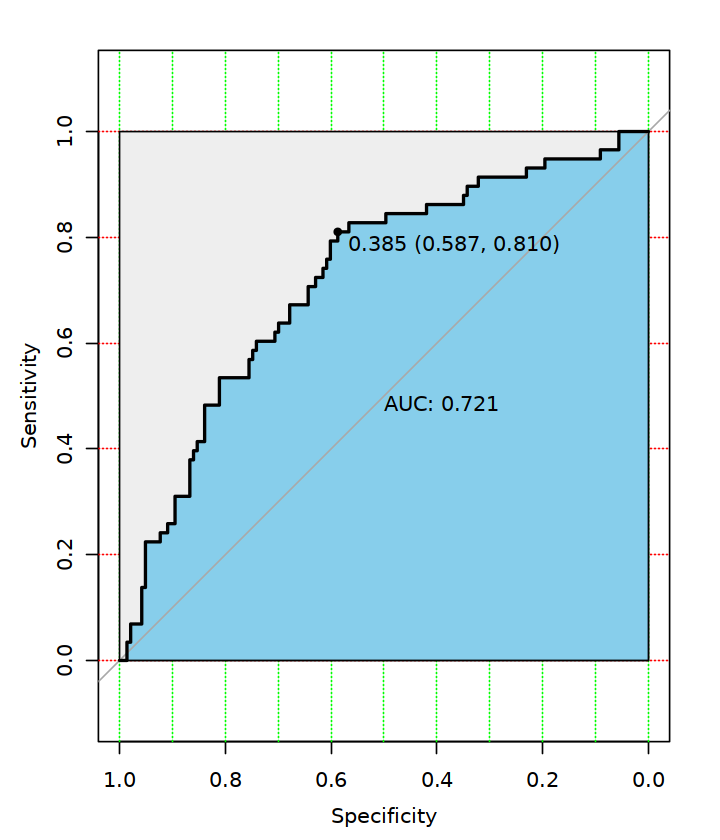

In [90]:
roc_curve <- pROC::roc(as.numeric(fold_test$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="")

In [69]:
saveRDS(data,file = 'model.sample.rds')